In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/2017_accidents_gu_bcn.csv')

In [3]:
df.shape

(10339, 27)

In [4]:
df.replace(['Desconegut', -1], [np.nan, np.nan], inplace = True)

In [5]:
df.columns = ['File number', 'District code', 'District name', 'Neighborhood code',
              'Neighborhood name', 'Street code', 'Street name', 'Postcode number',
              'Description week day', 'Week day', 'Type of day description',
              'NK Year', 'Month of year', 'Name month', 'Day of month', 'Hour of day',
              'Description turn', 'Description pedestrian cause', 'Number of deaths',
              'Number of minor injuries', 'Number of serious injuries',
              'Number of victims', 'Number of vehicles involved', 
              'UTM Coordinate (X)', 'UTM Coordinate (Y)', 'Longitude', 'Latitude']

df.columns

Index(['File number', 'District code', 'District name', 'Neighborhood code',
       'Neighborhood name', 'Street code', 'Street name', 'Postcode number',
       'Description week day', 'Week day', 'Type of day description',
       'NK Year', 'Month of year', 'Name month', 'Day of month', 'Hour of day',
       'Description turn', 'Description pedestrian cause', 'Number of deaths',
       'Number of minor injuries', 'Number of serious injuries',
       'Number of victims', 'Number of vehicles involved',
       'UTM Coordinate (X)', 'UTM Coordinate (Y)', 'Longitude', 'Latitude'],
      dtype='object')

In [6]:
df['Street name'] = df['Street name'].str.capitalize()

In [7]:
#Convert days of the week into integers so we can plot them
df['Day num'] = df['Description week day'].map({'Divendres': 5, 'Dimarts': 2, 'Dijous': 4, 
                                                'Dimecres': 3, 'Dilluns': 1, 'Dissabte': 6, 'Diumenge': 7})
df['Day num'] = df['Day num'].astype(int)

5    1761
2    1691
4    1677
3    1650
1    1510
6    1155
7     895
Name: Day num, dtype: int64


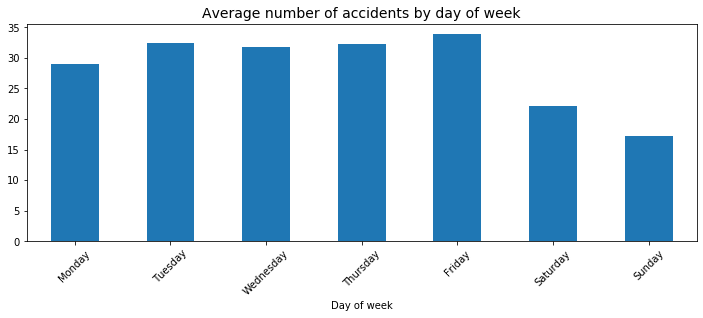

In [8]:
print(df['Day num'].value_counts())
byday = df.groupby('Day num').count()
(byday['File number']/52).plot(kind = 'bar', 
                               figsize = (12, 4))
plt.title('Average number of accidents by day of week', 
          size = 14)
plt.xlabel('Day of week')
plt.xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
           rotation = 45)
plt.show()

In [10]:
grouped_by_day = df.groupby('Day num').agg({'Number of serious injuries': 'sum',
                                            'File number': 'count'})\
                                        .rename(columns = {'Number of serious injuries': 'num_inj',
                                                           'File number': 'count_accidents'})

In [11]:
grouped_by_day['percent_serious'] = grouped_by_day.num_inj /grouped_by_day.count_accidents

In [13]:
grouped_by_day['weekly'] = round(grouped_by_day['count_accidents']/52)
grouped_by_day[['num_inj', 'count_accidents', 'percent_serious', 'weekly']]

,num_inj,count_accidents,percent_serious,weekly
Day num,,,,
1,27.0,1510,0.017881,29.0
2,34.0,1691,0.020106,33.0
3,31.0,1650,0.018788,32.0
4,33.0,1677,0.019678,32.0
5,44.0,1761,0.024986,34.0
6,33.0,1155,0.028571,22.0
7,39.0,895,0.043575,17.0


In [25]:
grouped_by_day.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_by_day[['percent_serious', 'weekly']]

,percent_serious,weekly
Monday,0.017881,29.0
Tuesday,0.020106,33.0
Wednesday,0.018788,32.0
Thursday,0.019678,32.0
Friday,0.024986,34.0
Saturday,0.028571,22.0
Sunday,0.043575,17.0


Text(0.0, 1.0, 'Sundays have the fewest accidents but more of them are serious')

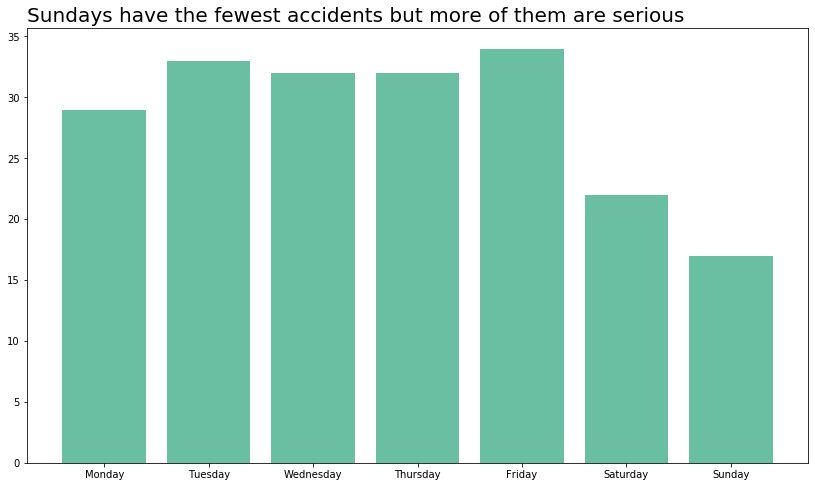

In [49]:
plt.figure(figsize =(14,8))
plt.bar(x = grouped_by_day.index, 
        height = grouped_by_day.weekly,
        color = '#45B08c',
        alpha = 0.8)
title = 'Sundays have the fewest accidents\
 but more of them are serious'
plt.title(title, 
          loc = 'left', 
          size = 20)

Monday       0.017881
Tuesday      0.020106
Wednesday    0.018788
Thursday     0.019678
Friday       0.024986
Saturday     0.028571
Sunday       0.043575
Name: percent_serious, dtype: float64

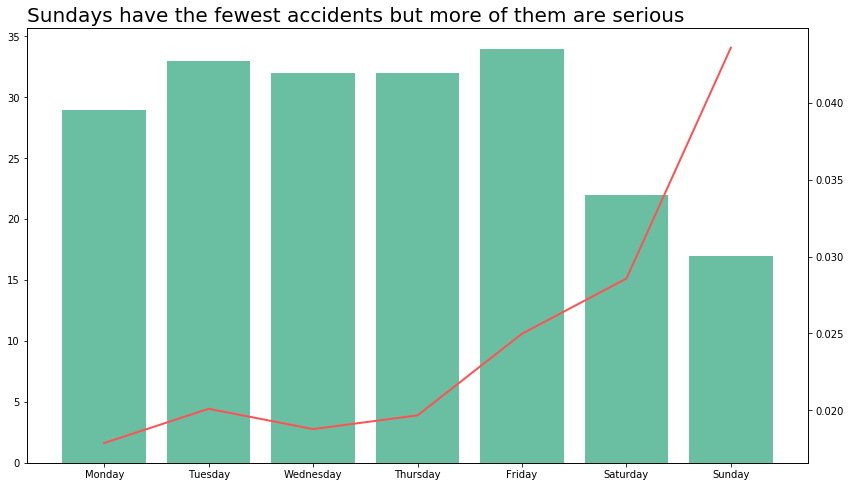

In [74]:
fig, ax1 = plt.subplots(figsize = (14,8))

ax2 = ax1.twinx()
ax1.bar(x = grouped_by_day.index, 
        height = grouped_by_day.weekly.values,
        color = '#45B08c', 
        alpha = 0.8)
ax2.plot(grouped_by_day.percent_serious, 
         color = '#ff5252', 
         lw = 2)
title = 'Sundays have the fewest accidents\
 but more of them are serious'
plt.title(title, 
          loc = 'left', 
          size = 20)
plt.show()

In [49]:
round(grouped_by_day['percent_serious']*100, 2)

Day num
1    1.79
2    2.01
3    1.88
4    1.97
5    2.50
6    2.86
7    4.36
Name: percent_serious, dtype: float64

In [50]:
df.head()

,File number,District code,District name,Neighborhood code,Neighborhood name,Street code,Street name,Postcode number,Description week day,Week day,...,Number of deaths,Number of minor injuries,Number of serious injuries,Number of victims,Number of vehicles involved,UTM Coordinate (X),UTM Coordinate (Y),Longitude,Latitude,Day num
0,2017S008429,NaN,NaN,NaN,NaN,NaN,Número 27 ...,NaN,Divendres,Dv,...,0.0,2.0,0.0,2.0,2.0,426936.65,4577079.15,2.125624,41.340045,5
1,2017S007316,NaN,NaN,NaN,NaN,NaN,Número 3 zona franca / número 50 zona franca ...,NaN,Divendres,Dv,...,0.0,2.0,0.0,2.0,2.0,426503.22,4577014.83,2.120452,41.339426,5
2,2017S010210,NaN,NaN,NaN,NaN,NaN,Litoral (besòs) ...,K128,Divendres,Dv,...,0.0,5.0,0.0,5.0,2.0,430450.5,4579358.49,2.167356,41.360885,5
3,2017S006364,NaN,NaN,NaN,NaN,NaN,Número 3 zona franca ...,77-111,Divendres,Dv,...,0.0,1.0,0.0,1.0,2.0,426842.33,4576816.19,2.124529,41.337668,5
4,2017S004615,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las navas de tolosa ...,0323 0325,Dijous,Dj,...,0.0,1.0,0.0,1.0,3.0,"432006,95","4585503,52",2.185272,41.416365,4
